![46](46.png)

In [2]:
import numpy as np

In [3]:
A = np.array([6, 3, 4, 9, 2, 1])
B = np.array([6, 3, 4, 9, 2, 1])
print(np.sum(A * B))
print(np.dot(A, B))

147
147


In [4]:
import math

class Solution:
    def calculate_mean(self, X):
        # Your code here
        N = len(X)
        return np.sum(X) / N

    def calculate_median(self, X):
        X = sorted(X)
        N = len(X)


        if N % 2 == 0 : # if even
            N = N - 1
            print(f'{N//2}, {N//2 + 1}')
            return (X[N//2] + X[N//2 + 1]) / 2

        # if odd by default
        return X[(N+1)//2]


    def calculate_variance_std(self, X):
        N = len(X)

        #? Calc Mean
        Mean = 1/N * np.sum(X)
        Variance = 1/N * np.sum((X - Mean)**2)
        std = np.sqrt(Variance)

        return round(Variance, 2), round(std, 2)

    def calculate_correlation_coefficient(self, X, Y):
        X = np.array(X, dtype=float)
        Y = np.array(Y, dtype=float)

        N = len(X)
        # np.dot is similar to sum of mutiplication
        numerator = N*np.dot(X, Y) - np.sum(X)*np.sum(Y)
        denominator = np.sqrt(N*np.sum(X**2) - np.sum(X)**2) * np.sqrt(N*np.sum(Y**2) - np.sum(Y)**2)
        p = numerator / denominator

        if math.isnan(p):
            print('Value is Not a Number')
            return -1

        return round(p, 2)

    def calculate_dot_product(self, u, v):
        return np.dot(u, v).astype(int)

# X = [[7, 0, 6, 2, 5, 7]]
# for x in X:
    # sol = Solution().calculate_mean(x)
    # print(sol)
    # sol = Solution().calculate_median(x)
    # print(sol)

data = [6, 3, 4, 9, 2, 1]
# sol = Solution().calculate_variance_std(data)
# print(sol)

# X = [[1, 1, 1, 1], [7, 15, 10, 12, 8, 6, 15], [1, 2, 3, 4, 5]]
# Y = [[2, 2, 2, 2], [18, 6, 16, 10, 11, 12, 17], [2, 4, 6, 8, 10]]
# for x, y in zip(X, Y):
#     sol = Solution().calculate_correlation_coefficient(x, y)
#     print(sol)

v = [-1, 2, -3.5]
u = [4, -5, 6]
sol = Solution().calculate_dot_product(u, v)
print(sol)

-35


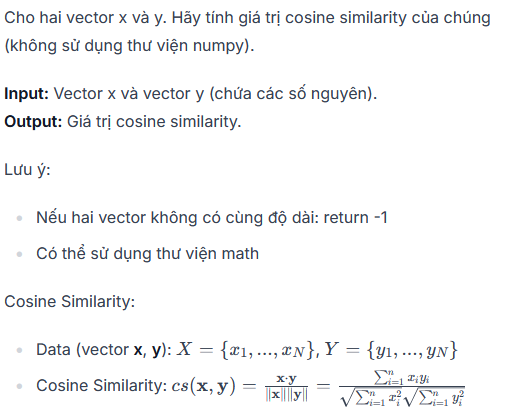

In [5]:
import math

class Solution:
    def cosine_similarity(self, X, Y):
        if len(X) != len(Y):
            return -1

        nume = 0
        deno_x = 0
        deno_y = 0
        for x, y in zip(X, Y):
            nume += (x*y)
            deno_x += x**2
            deno_y += y**2

        deno = (math.sqrt(deno_x) * math.sqrt(deno_y))

        return nume / deno if deno != 0 else 0

# x = [1,1,1,1,0,0,0,0,0,0]
# y = [1,1,1,0,1,0,0,0,0,0]
# Z = [0,0,0,0,0,1,1,1,1,1]
x = [1, 3, 4, 3]
y = [0, 3, 4, 0]
sol = Solution().cosine_similarity(x, y)
print('sol:', sol)

sol: 0.8451542547285166


In [6]:
A = [[1, 4], [3, 2]]
a = A[0][0]
b = A[0][1]
c = A[1][0]
d = A[1][1]

I = np.array([[1, 0], [0, 1]])
print(I)
print(f"a: {a}, b: {b}, c: {c}, d: {d}")

[[1 0]
 [0 1]]
a: 1, b: 4, c: 3, d: 2


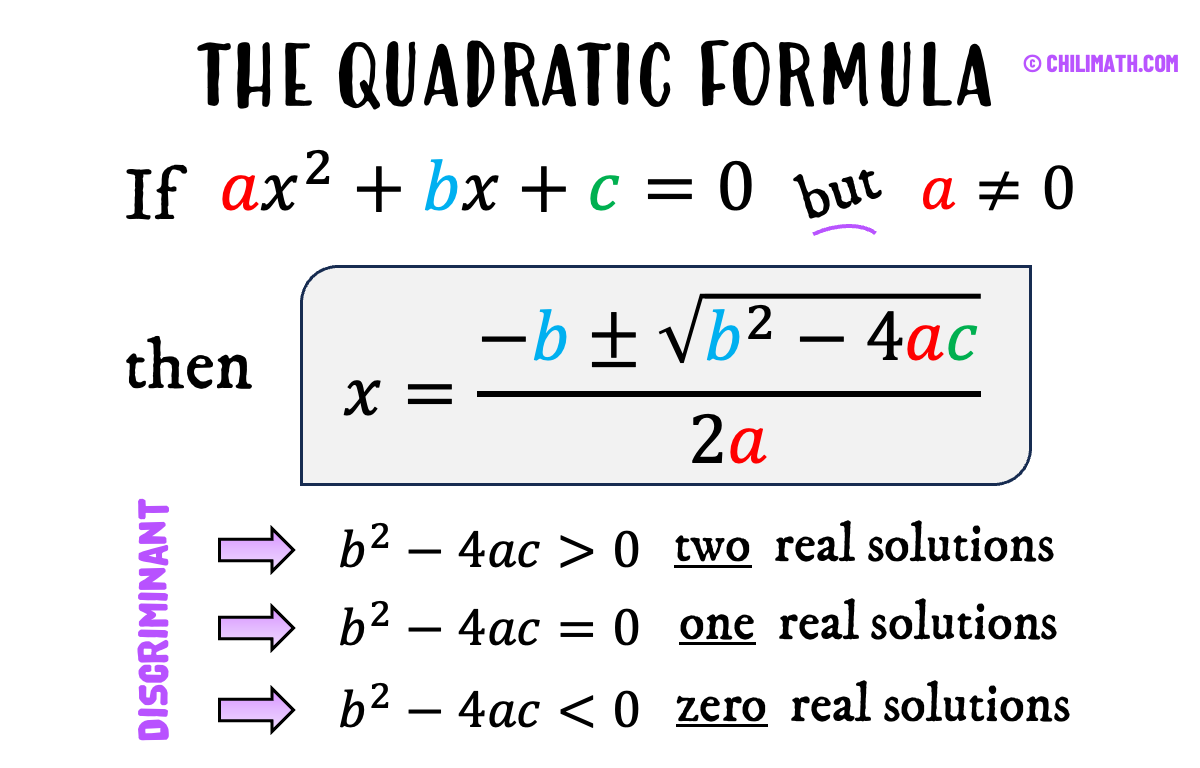

In [7]:
import math


#! Learn Linear Algebra: EigenValue and EigenVector to understand linear dependent equation, non-trivial eigenvector
#? everything else is just simplified fomula
class Solution:
    def calculate_eigenvalues_eigenvectors(self, A):
        def get_eigenvalues(matrix):
            a = matrix[0][0]
            b = matrix[0][1]
            c = matrix[1][0]
            d = matrix[1][1]

            trace = a + d
            det = a*d - b*c
            # apply quadratic fomula
            eigenvalue1 = (trace + math.sqrt(trace**2 - 4*det)) / 2
            eigenvalue2 = (trace - math.sqrt(trace**2 - 4*det)) / 2

            return eigenvalue1, eigenvalue2

        def get_eigenvectors(matrix, eigenvalue):
            a = matrix[0][0]
            b = matrix[0][1]
            c = matrix[1][0]
            d = matrix[1][1]
            eigenvectors = []

            for lam in eigenvalue:
                # Solve (A-lam)v = 0
                # Matrix A - lam.I = [[a - lam, b], [c, d - lam]].[x, y] = [0, 0]
                # Multiply we have 2 equation and find a non-trivial solution for x and y:
                # 1. (A - lam)x + by = 0 -> calc x with y = 1
                # 2. cx + (d - lam)y = 0 -> calc y with x = 1

                #? 2 equation is linearly dependent
                # if b!=0 and y=1 and solve for x: (a-lam)x + b = 0
                if b != 0: # if b!= 0, use first row
                    x = -b / (a-lam) if (a-lam)!= 0 else 0
                    y = 1
                else: # if b=0 and x = 1
                    x = 1
                    y  = -c / (d-lam) if (d-lam)!=0 else 0


                if x==0 and y==0: # if eigenvector = 0, NOT FOUND
                    print(f'No non-trivial eigenvector found for eigenvalue {lam}')
                    eigenvectors.append(None)

                norm = math.sqrt(x**2 + y**2)
                normalize_x, normalize_y = x/norm, y/norm

                eigenvectors.append([normalize_x, normalize_y])

            return eigenvectors


        eigenvalue1, eigenvalue2 = get_eigenvalues(A)
        eigenvector1, eigenvector2 = get_eigenvectors(A, (eigenvalue1, eigenvalue2))

        return {
            eigenvalue1: eigenvector1,
            eigenvalue2: eigenvector2
        }

# Example usage
A = [[[1, 4], [3, 2]], [[2,1], [1,2]], [[0, 1], [1, 0]]]

for a in A:
    solution = Solution()
    result = solution.calculate_eigenvalues_eigenvectors(a)
    print(result)

{5.0: [0.7071067811865475, 0.7071067811865475], -2.0: [-0.7999999999999999, 0.6]}
{3.0: [0.7071067811865475, 0.7071067811865475], 1.0: [-0.7071067811865475, 0.7071067811865475]}
{1.0: [0.7071067811865475, 0.7071067811865475], -1.0: [-0.7071067811865475, 0.7071067811865475]}


In [8]:
import math

def eigenvalues_eigenvectors_2x2(matrix):
    """
    Calculate eigenvalues and eigenvectors of a 2x2 matrix.
    Input: matrix = [[a, b], [c, d]]
    Output: (eigenvalues, eigenvectors) where eigenvalues is a list of scalars,
            and eigenvectors is a list of [x, y] vectors.
    """
    if len(matrix) != 2 or len(matrix[0]) != 2 or len(matrix[1]) != 2:
        raise ValueError("Input must be a 2x2 matrix")

    a, b = matrix[0][0], matrix[0][1]
    c, d = matrix[1][0], matrix[1][1]

    # Calculate trace and determinant
    trace = a + d
    det = a * d - b * c

    # Calculate eigenvalues using the quadratic formula
    discriminant = trace**2 - 4 * det
    if discriminant < 0:
        print("Eigenvalues are complex; this function handles real eigenvalues only.")
        return [], []

    sqrt_disc = math.sqrt(discriminant)
    lambda1 = (trace + sqrt_disc) / 2
    lambda2 = (trace - sqrt_disc) / 2
    eigenvalues = [lambda1, lambda2]

    # Calculate eigenvectors
    eigenvectors = []
    for lam in eigenvalues:
        # Solve (A - λI)v = 0
        # Matrix A - λI = [[a - λ, b], [c, d - λ]]
        m11 = a - lam
        m12 = b
        m21 = c
        m22 = d - lam

        # Find eigenvector by solving the system
        # Try setting y = 1 and solve for x: (a - λ)x + b = 0
        if m12 != 0:  # If b != 0, use first row
            x = -m12 / m11 if m11 != 0 else 0
            y = 1
        else:  # If b = 0, use second row: cx + (d - λ)y = 0
            x = 1
            y = -m21 / m22 if m22 != 0 else 0

        # Check if the solution is valid (non-zero vector)
        if x == 0 and y == 0:
            print(f"No non-trivial eigenvector found for eigenvalue {lam}")
            eigenvectors.append(None)
        else:
            eigenvectors.append([x, y])

    return eigenvalues, eigenvectors

# Example usage
def normalize_vector(vector):
    """Normalize a vector to have unit length."""
    if vector is None:
        return None
    x, y = vector
    length = math.sqrt(x**2 + y**2)
    if length == 0:
        return [0, 0]
    return [x / length, y / length]

# Test the function
if __name__ == "__main__":
    # Example matrix
    matrix = [[1, 4], [3, 2]]
    eigenvalues, eigenvectors = eigenvalues_eigenvectors_2x2(matrix)

    print("Matrix:")
    for row in matrix:
        print(row)
    print("\nEigenvalues:", eigenvalues)
    print("Eigenvectors (normalized):")
    for i, vec in enumerate(eigenvectors):
        if vec is not None:
            normalized = normalize_vector(vec)
            print(f"For eigenvalue {eigenvalues[i]}: {normalized}")
        else:
            print(f"For eigenvalue {eigenvalues[i]}: None")

Matrix:
[1, 4]
[3, 2]

Eigenvalues: [5.0, -2.0]
Eigenvectors (normalized):
For eigenvalue 5.0: [0.7071067811865475, 0.7071067811865475]
For eigenvalue -2.0: [-0.7999999999999999, 0.6]


In [9]:
class Solution:
    def calculate_median(self, X):
        X = sorted(X)
        n = len(X)
        if n % 2 == 0:
            median = (X[n // 2 - 1] + X[n // 2]) / 2
        else:
            median = X[n // 2]
        return median


X = [1, 2, 3, 4, 5, 6]
solution = Solution()
result = solution.calculate_median(X)
print('Result:', result)

Result: 3.5


In [10]:
class Solution:
    def calculate_variance_std(self, data):
        # Calculate the mean
        mean = np.sum(data) / len(data)

        # Calculate the variance
        variance = np.sum((data - mean)**2) / len(data)

        # Calculate the standard deviation
        std_dev = np.sqrt(variance)

        return variance, std_dev

data = [10, 20, 30, 40, 50]
solution = Solution()
result = solution.calculate_variance_std(data)
print('Result:', result)

Result: (np.float64(200.0), np.float64(14.142135623730951))


In [11]:
class Solution:
    def calculate_matrix_product(self, A, B):
        A = np.array(A, dtype=np.float32)
        B = np.array(B, dtype=np.float32)

        # Your code here
        if A.shape[0] != B.shape[1]:
            return -1

        return np.dot(A, B)

A = [[8, 8, 1], [2, 7, 0]]
B = [[8, 1], [7, 1], [2, 8]]
solution = Solution()
result = solution.calculate_matrix_product(A, B)
result

array([[122.,  24.],
       [ 65.,   9.]], dtype=float32)

In [ ]:
import numpy as np

# Class 0
mean_length_1 = 4.867
std_length_1 = np.sqrt(0.078)
mean_width_1 = 3.367
std_width_1 = np.sqrt(0.095)

# Class 1
mean_length_2 = 6.216
std_length_2 = np.sqrt(0.228)
mean_width_2 = 2.916
std_width_2 = np.sqrt(0.111)

# New sample
# x_length = 5.5
# x_width = 3.0

x_length = 4.1
x_width = 2.9


# Gaussian probability density function
def gaussian_pdf(X, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((X - mean) ** 2) / (2 * std ** 2))

#? Calculate likelihood for Class 1
p_c1_width = gaussian_pdf(x_width, mean_width_1, std_width_1)
p_c1_length = gaussian_pdf(x_length, mean_length_1, std_length_1)

#? Calculate likelihood for Class 2
p_c2_width = gaussian_pdf(x_width, mean_width_2, std_width_2)
p_c2_length = gaussian_pdf(x_length, mean_length_2, std_length_2)

p_c1, p_c2 = 0.5, 0.5

#? Combined likelihood
likelihood_c1 = p_c1_width * p_c1_length
likelihood_c2 = p_c2_width * p_c2_length
# print(likelihood_c1, likelihood_c2)

marginal_likelihood = likelihood_c1*p_c1 + likelihood_c2*p_c2

#? P(Class|X) = P(X|Class) × P(Class) / P(X)
posterior_c1 = (likelihood_c1*p_c1 / marginal_likelihood)
posterior_c2 = (likelihood_c2*p_c2 / marginal_likelihood)

#! Prob of a class using Gaussian Naive Bayes apply MAP (Maximum Likelihood Estimation) like normal Naive Bayes molde
#? Basicall calculate like Naive Bayes
print()
print('marginal_likelihood:', marginal_likelihood)
print(f"Likelihood Class 1: {likelihood_c1:.6f}")
print(f"Likelihood Class 2: {likelihood_c2:.6f}")
print(f"Posterior P(Class1|X): {posterior_c1:.6f}")
print(f"Posterior P(Class2|X): {posterior_c2:.6f}")
predict_class = 'Class 1' if posterior_c1 > posterior_c2 else 'Class 2'
print(f"Prediction: {predict_class}")


marginal_likelihood: 0.006782119584392831
Likelihood Class 1: 0.013510
Likelihood Class 2: 0.000054
Posterior P(Class1|X): 0.995992
Posterior P(Class2|X): 0.004008
Prediction: Class 1


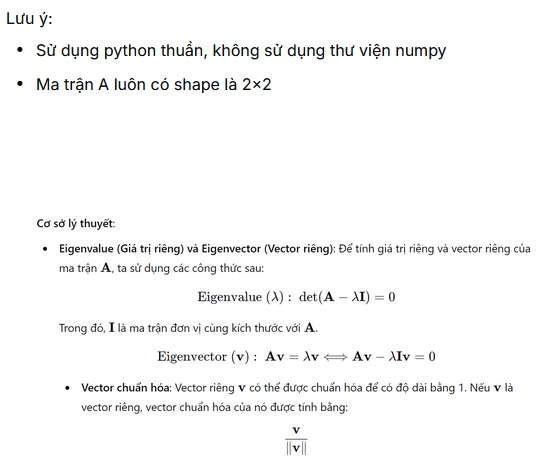

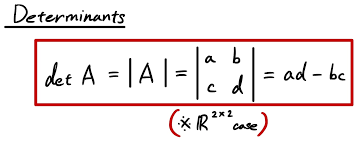

![det](det.png)

In [13]:
import math

class Solution:
    def calculate_eigenvalues_eigenvectors(self, A):
        """
        A list[list]: 2x2 matrix
        """
        def get_eigenvalues(matrix):


            return eigenvalue1, eigenvalue2

        def get_eigenvectors(matrix, eigenvalue):
            # Your code here
            return eigenvector1, eigenvector2


        return {eigenvalue1: eigenvector1, eigenvalue2: eigenvector2}


A = A = [[1, 4], [3, 2]]
rel = Solution().calculate_eigenvalues_eigenvectors(A)
print(rel)

NameError: name 'eigenvalue1' is not defined

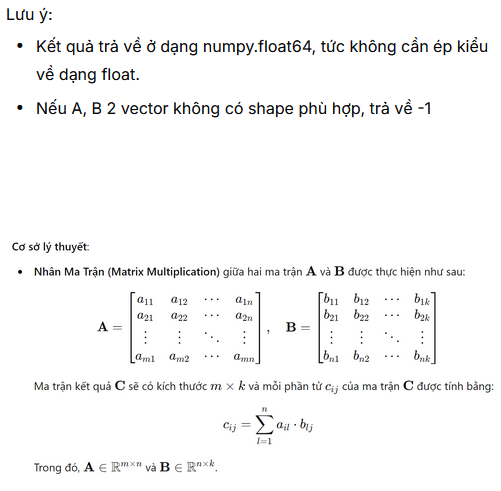

In [ ]:

A = [[8, 8, 1], [2, 7, 0]]
B = [[8, 1], [7, 1], [2, 8]]

A = np.array(A).shape[0]
B = np.array(B).shape[1]
print(A)
print(B)

(2, 3)
(3, 2)


In [ ]:
class Solution:
    def calculate_matrix_product(self, A, B):
        # Your code here
        if A.shape[0] != B.shape[1]:
            return -1

        return np.dot(A, B)


A = [[8, 8, 1], [2, 7, 0]]
B = [[8, 1], [7, 1], [2, 8]]
A = np.array(A)
B = np.array(B)
rel = Solution().calculate_matrix_product(A, B)
print(rel)
print(rel.dtype)

[[122  24]
 [ 65   9]]
int64


In [ ]:
class Solution:
    def calculate_correlation_coefficient(self, X, Y):
        p = 0
        n = len(X)

        bot_x = np.sum(n * np.sum(X**2) - sum(X)**2)
        bot_y = np.sum(n * np.sum(Y**2) - sum(Y)**2)
        top = n*np.sum(np.dot(X, Y)) - np.dot(np.sum(X), np.sum(Y))
        bot = np.sqrt(bot_x) * np.sqrt(bot_y)
        p = round(top / bot, 2)

        if p == float('nan'):
            return -1

        return p


X = [7, 15, 10, 12, 8, 6, 15]
Y = [18, 6, 16, 10, 11, 12, 17]
X = np.array(X)
Y = np.array(Y)
rel = Solution().calculate_correlation_coefficient(X, Y)
print(rel)

-0.29


In [ ]:
sum = 0
for x in range(1, 7):
    sum += x*1/6
print(sum)

3.5


### Steps to Calculate Eigenvalues and Eigenvectors for a 2x2 Matrix

1. **Define the Matrix**  
    Let the 2x2 matrix be:
    $$
    A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
    $$

2. **Find the Characteristic Equation**  
    The eigenvalues are the roots of the characteristic equation:
    $$
    \text{det}(A - \lambda I) = 0
    $$
    Here, \( I \) is the identity matrix, and \( \lambda \) is the eigenvalue.  
    Substituting \( A - \lambda I \):
    $$
    \begin{vmatrix} a - \lambda & b \\ c & d - \lambda \end{vmatrix} = 0
    $$
    Compute the determinant:
    $$
    (a - \lambda)(d - \lambda) - bc = 0
    $$
    Simplify to get the quadratic equation:
    $$
    \lambda^2 - (a + d)\lambda + (ad - bc) = 0
    $$

3. **Solve for Eigenvalues**  
    Solve the quadratic equation using the quadratic formula:
    $$
    \lambda = \frac{-(a + d) \pm \sqrt{(a + d)^2 - 4(ad - bc)}}{2}
    $$
    The two solutions are the eigenvalues, \( \lambda_1 \) and \( \lambda_2 \).

4. **Find the Eigenvectors**  
    For each eigenvalue \( \lambda \), solve the equation:
    $$
    (A - \lambda I)v = 0
    $$
    Here, \( v \) is the eigenvector.  
    Substituting \( A - \lambda I \):
    $$
    \begin{bmatrix} a - \lambda & b \\ c & d - \lambda \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
    $$
    Solve the system of linear equations to find the eigenvector \( v = \begin{bmatrix} x \\ y \end{bmatrix} \).

5. **Normalize the Eigenvectors (Optional)**  
    Normalize the eigenvectors to have unit length if required:
    $$
    v = \frac{v}{\|v\|}
    $$

6. **Verify the Results**  
    Verify that:
    $$
    Av = \lambda v
    $$
    for each eigenvalue \( \lambda \) and its corresponding eigenvector \( v \).
```

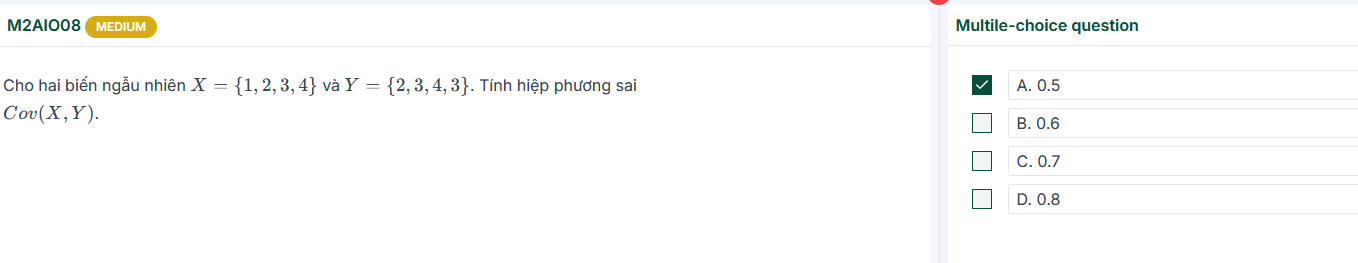

sample hay population

In [ ]:
def covariance(X, Y):
    cov = np.sum((X - np.mean(X)) * (Y - np.mean(Y)))
    n = len(X)

    return 1/(n) * cov

X = [1,2,3,4]
Y = [2,3,4,3]
X = np.array(X)
Y = np.array(Y)
print(covariance(X, Y))

0.5


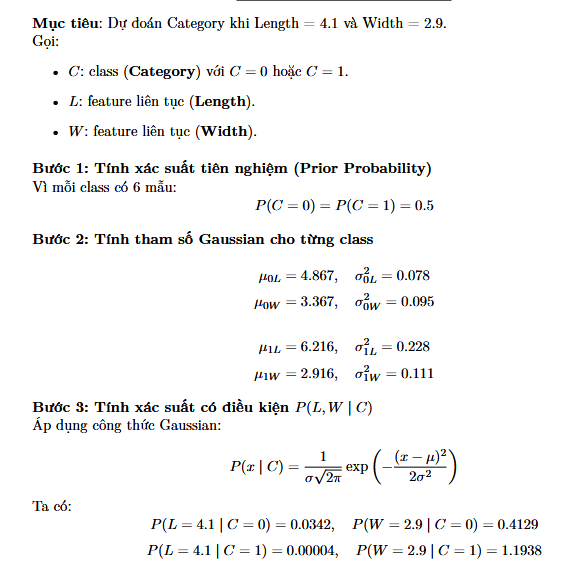

In [ ]:
0.4


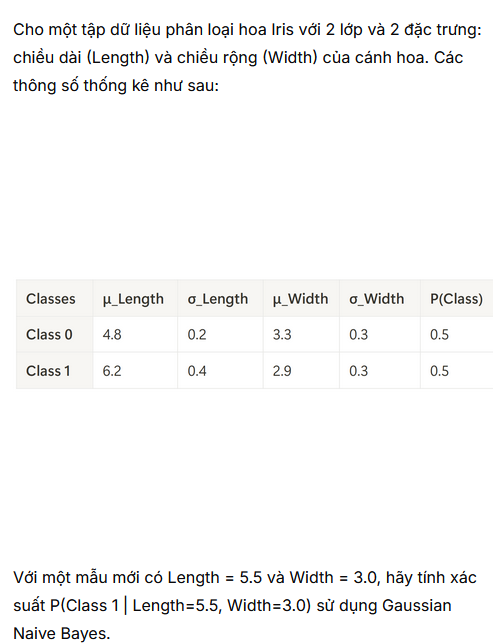
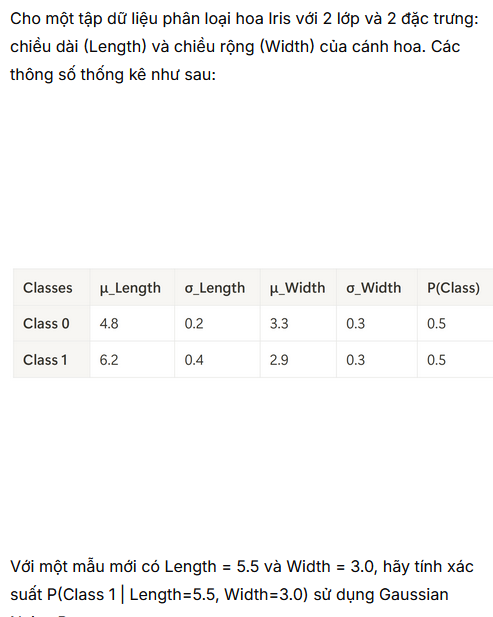

In [ ]:
import numpy as np

def gaussian(x, mean, std_dev):
    """
    Calculates the probability density function (PDF) of a Gaussian distribution.

    Args:
        x (float or np.ndarray): The value(s) at which to evaluate the PDF.
        mean (float): The mean (average) of the distribution.
        std_dev (float): The standard deviation of the distribution.

    Returns:
        float or np.ndarray: The PDF value(s) at the given x.
    """
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x - mean)**2) / (2 * std_dev**2))

# Example usage:
x_values = 5.5
mean_val = 4.8
std_dev_val = 0.2
y_values = gaussian(x_values, mean_val, std_dev_val)


In [ ]:
4/10 * 4/10
2

In [ ]:
3/10 * 4/10

0.12

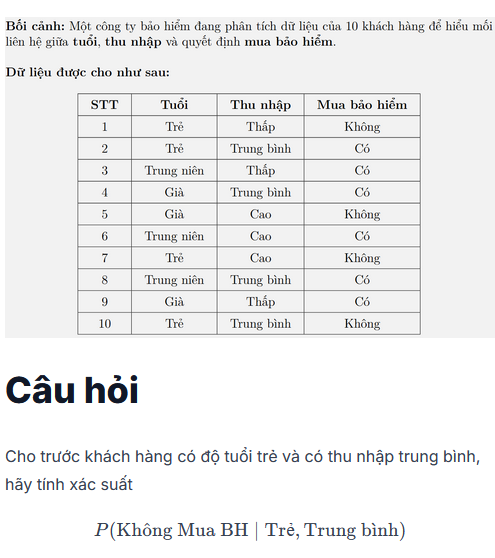

In [ ]:
import numpy

def gaussian_pdf(x, mean, std):
    var = std ** 2
    return (1 / math.sqrt(2 * math.pi * var)) * math.exp(-((x - mean) ** 2) / (2 * var))

def calculate_statistics(data, population=True):
    mean = np.sum(data) / len(data)
    if population:
        var = np.sum((x - mean) ** 2 for x in data) / len(data)
    else:
        var = np.sum((x - mean) ** 2 for x in data) / (len(data) - 1)
    return mean, math.sqrt(var)

def calculate_likelihood(pin_dung, pin_thoi_gian):
    dung_hong = [2900, 1000, 950, 980, 920, 1050, 1100, 1020, 990, 1080]
    time_hong = [150, 300, 320, 310, 330, 290, 280, 305, 315, 295]

    mean_dung, std_dung = calculate_statistics(dung_hong)
    mean_time, std_time = calculate_statistics(time_hong)

    pdf_dung = gaussian_pdf(pin_dung, mean_dung, std_dung)
    pdf_time = gaussian_pdf(pin_thoi_gian, mean_time, std_time)


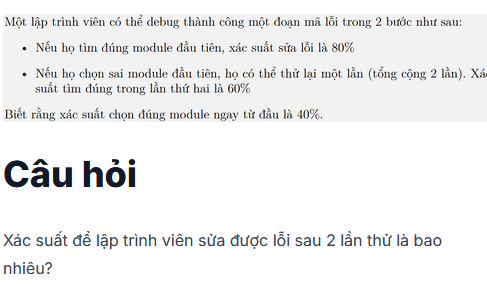

In [ ]:
0.24


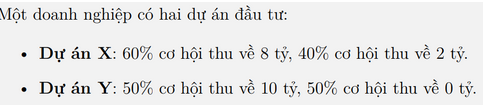

In [ ]:
mean_x = 0.6*8 + 0.4*2
mean_y = 0.5*10 + 0.5*0
print(mean_x, mean_y)

mu_x = (0.6*(8-mean_x)**2) + (0.4 * (2 - mean_x)**2)
mu_y = (0.5*(10-mean_y)**2) + (0.5 * (0 - mean_y)**2)
print(mu_x, mu_y)
print(mu_y)

5.6 5.0
8.64 25.0
25.0


In [ ]:
(0.5*0.01 + 0.3*0.02 + 0.2*0.05)

0.2 *0.05 / 0.021 #total prob

# bayes
0.79

0.4761904761904763

In [ ]:
mean_a = 0.7*3 + 0.3*-2
mean_b = 0.5*5 + 0.5*-5
mu_a = (0.7*(3-mean_a)**2) + (0.3 * (-2 - mean_a)**2)
mu_b = (0.5*(5-mean_b)**2) + (0.5 * (-5 - mean_b)**2)
print(mean_a, mean_b)
print(mu_a, mu_b)
print(mu_b - mu_a)

1.4999999999999996 0.0
5.25 25.0
19.75


In [ ]:
2.7 - 2.763
5


In [ ]:
X = [15, 10, -5, -10]
Y = [0.125, 0.375, 0.375, 0.125]
expected_var = 0

for x, y in zip(X, Y):
    expected_var += (x*y)
    print(x, y, expected_var)

print('expected_var:', expected_var)

15 0.125 1.875
10 0.375 5.625
-5 0.375 3.75
-10 0.125 2.5
expected_var: 2.5


In [ ]:
p = 0.75
C = 50
F=C*9/5+32
print(F) # increase

dollar = 5
euro = dollar*0.91
print(euro)


122.0
4.55
